# **Automatidata project**

A fictional company named Automatidata works with its clients to transform their unused and stored data into useful solutions, such as performance dashboards, customer-facing tools, strategic business insights, and more. They specialize in identifying a client’s business needs and utilizing their data to meet those business needs. 

Automatidata is consulting for the New York City Taxi and Limousine Commission (TLC). New York City TLC is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles. The agency has partnered with Automatidata to develop a regression model that helps estimate taxi fares before the ride, based on data that TLC has gathered. 

The TLC data comes from over 200,000 taxi and limousine licensees, making approximately one million combined trips per day. 

In [263]:
# Import packages and libraries
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, date, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics


from xgboost import XGBClassifier, plot_importance



In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elhamhassankedwany/2017-yellow-taxi-trip-data-csv")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\cheny\.cache\kagglehub\datasets\elhamhassankedwany\2017-yellow-taxi-trip-data-csv\versions\1


In [3]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

### EDA

In [5]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [6]:
df.describe(include='all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [8]:
# How many of each payment type are represented in the data?
df.value_counts('payment_type')

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

According to the data dictionary, the payment method was encoded as follows:

1 = Credit card  
2 = Cash  
3 = No charge  
4 = Dispute  
5 = Unknown  
6 = Voided trip

In [10]:
# How many times is each vendor ID represented in the data?
df.value_counts('VendorID')

VendorID
2    12626
1    10073
Name: count, dtype: int64

In [11]:
# Convert data columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

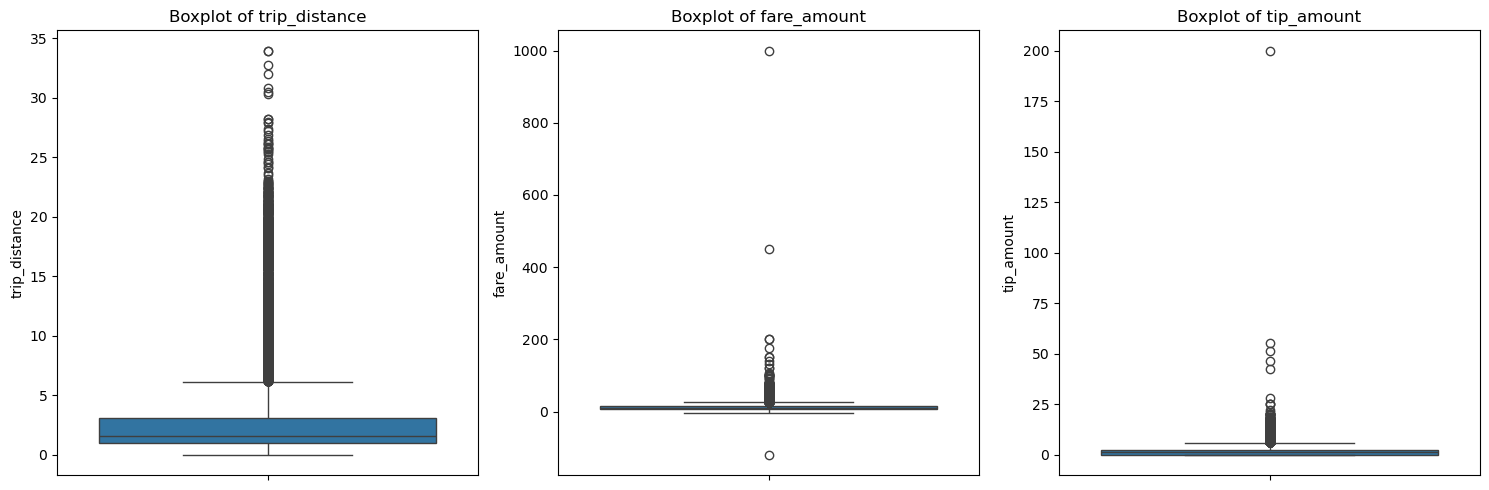

In [12]:
# check the distribution of some columns
list = ['trip_distance', 'fare_amount', 'tip_amount']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for col, ax in zip(list, axes):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

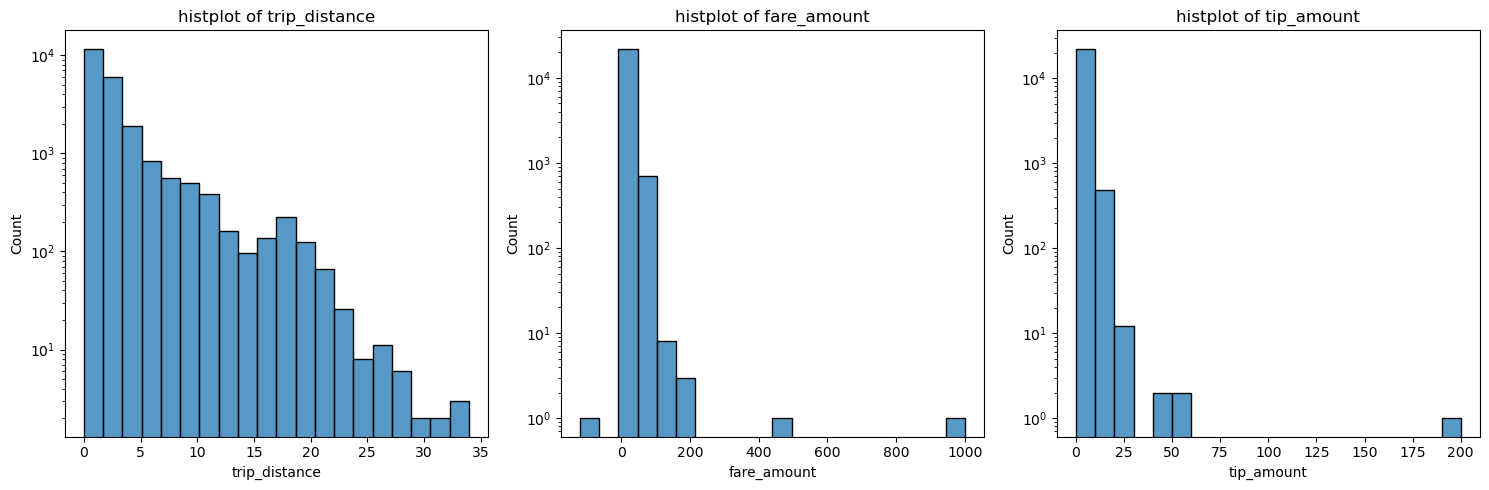

In [13]:
list = ['trip_distance', 'fare_amount', 'tip_amount']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for col, ax in zip(list, axes):
    sns.histplot(df[col], bins=20, ax=ax)
    ax.set_title(f'histplot of {col}')
    ax.set_yscale('log')

plt.tight_layout()
plt.show()

In [14]:
# examine the unique values in the `passenger_count` column.
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

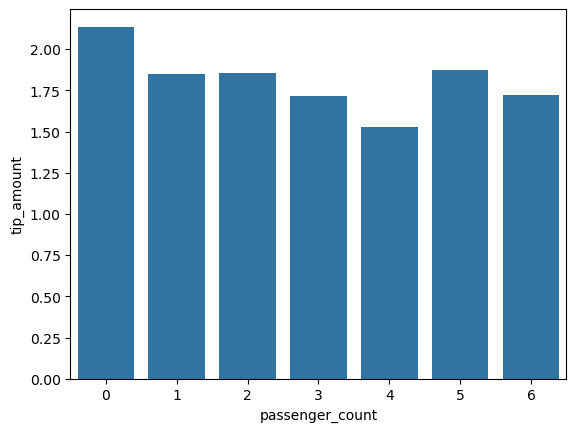

In [15]:
mean_tips_by_passenger_count = df.groupby('passenger_count')[['tip_amount']].mean()
mean_tips_by_passenger_count
sns.barplot(x=mean_tips_by_passenger_count.index, y=mean_tips_by_passenger_count['tip_amount'])
plt.show()

In [16]:
# check the passenger volumn by date

# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
df[['month','day']].head()

,month,day
0,March,Saturday
1,April,Tuesday
2,December,Friday
3,May,Sunday
4,April,Saturday


In [277]:
# Get total number of rides for each month
monthly_ride = df['month'].value_counts()
monthly_ride

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [279]:
month_order=['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']
monthly_ride = monthly_ride.reindex(index=month_order)
monthly_ride

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

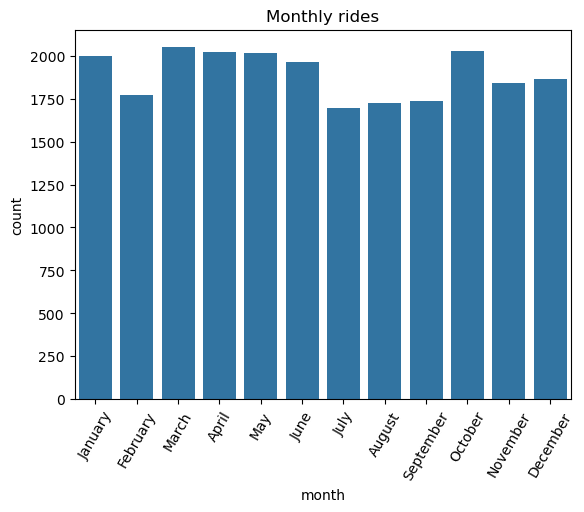

In [281]:
ax=sns.barplot(x=monthly_ride.index,y=monthly_ride)
plt.xticks(rotation=60)
plt.title('Monthly rides')
plt.show()

In [283]:
# calculate monthly revenue
monthly_revenue = df.groupby('month')[['total_amount']].sum()
monthly_revenue = monthly_revenue.reindex(index=month_order)
monthly_revenue

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


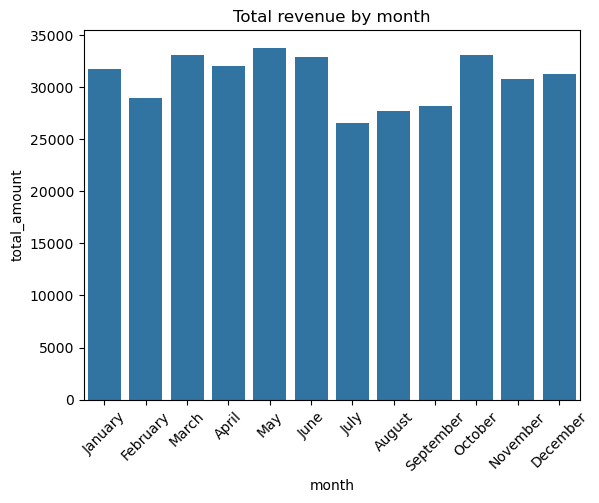

In [285]:
sns.barplot(x=monthly_revenue.index, y=monthly_revenue['total_amount'])
plt.title('Total revenue by month')
plt.xticks(rotation=45)
plt.show()

In [287]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = df['day'].value_counts()
daily_rides = daily_rides.reindex(index=weekday_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

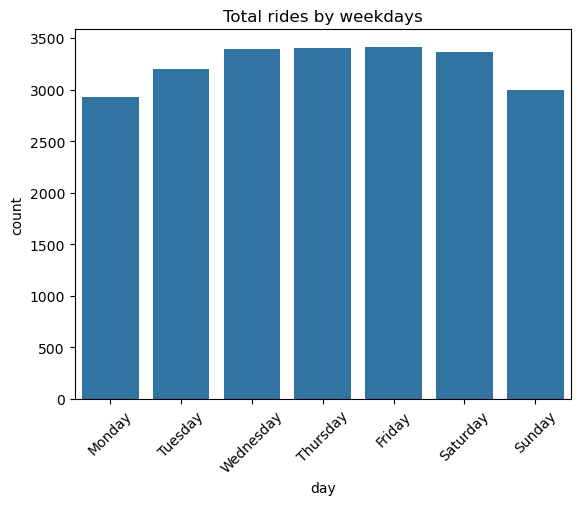

In [289]:
sns.barplot(x=daily_rides.index, y=daily_rides)
plt.title('Total rides by weekdays')
plt.xticks(rotation=45)
plt.show()

In [291]:
# plot revenues by day
daily_revenue = df.groupby('day')[['total_amount']].sum()
daily_revenue = daily_revenue.reindex(index=weekday_order)
daily_revenue

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


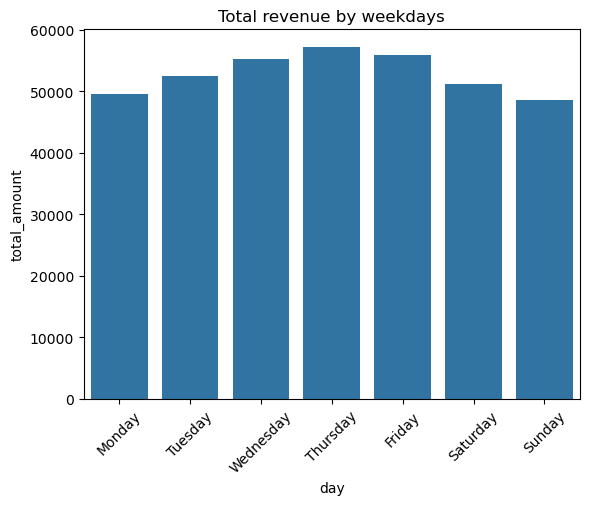

In [293]:
sns.barplot(x=daily_revenue.index, y=daily_revenue['total_amount'])
plt.title('Total revenue by weekdays')
plt.xticks(rotation=45)
plt.show()

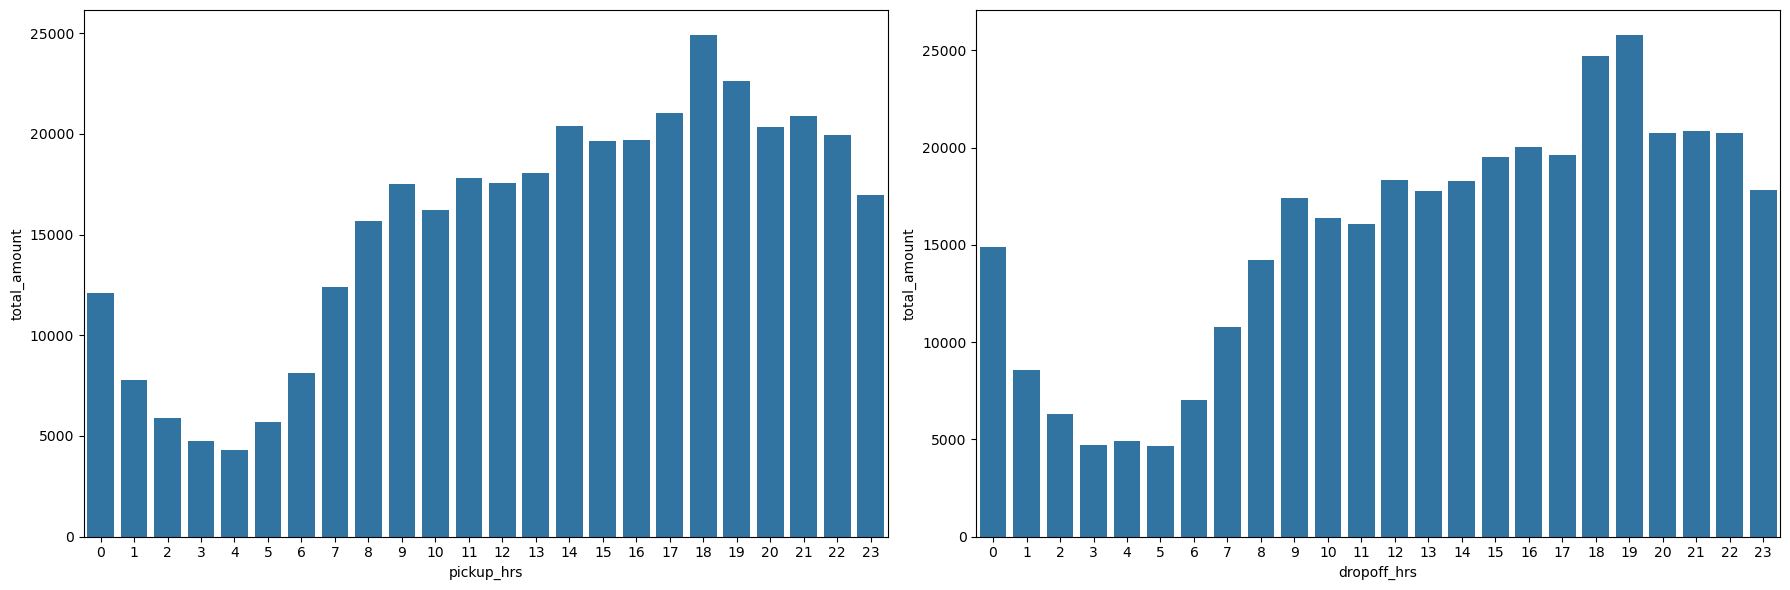

In [295]:
# calculate revenue and average fare by hour
df['pickup_hrs'] = df['tpep_pickup_datetime'].dt.hour
df['dropoff_hrs'] = df['tpep_dropoff_datetime'].dt.hour

revenue_pickup_hrs = df.groupby('pickup_hrs')['total_amount'].sum()

revenue_dropoff_hrs = df.groupby('dropoff_hrs')['total_amount'].sum()

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.barplot(x=revenue_pickup_hrs.index, y=revenue_pickup_hrs)
plt.subplot(1,2,2)
sns.barplot(x=revenue_dropoff_hrs.index, y=revenue_dropoff_hrs)
plt.tight_layout()
plt.show()

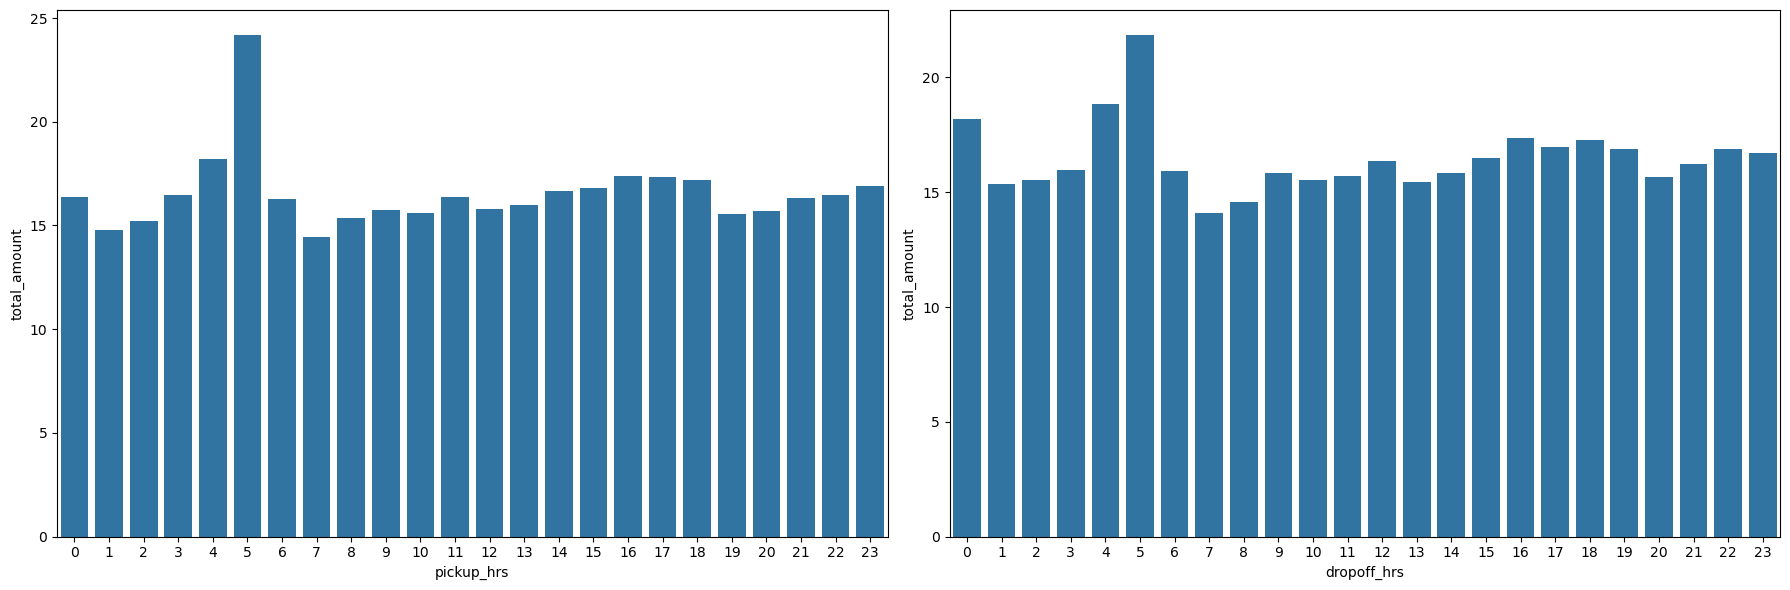

In [297]:
avg_pickup_hrs = df.groupby('pickup_hrs')['total_amount'].mean()
avg_dropoff_hrs = df.groupby('dropoff_hrs')['total_amount'].mean()

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.barplot(x=avg_pickup_hrs.index, y=avg_pickup_hrs)
plt.subplot(1,2,2)
sns.barplot(x=avg_dropoff_hrs.index, y=avg_dropoff_hrs)
plt.tight_layout()
plt.show()

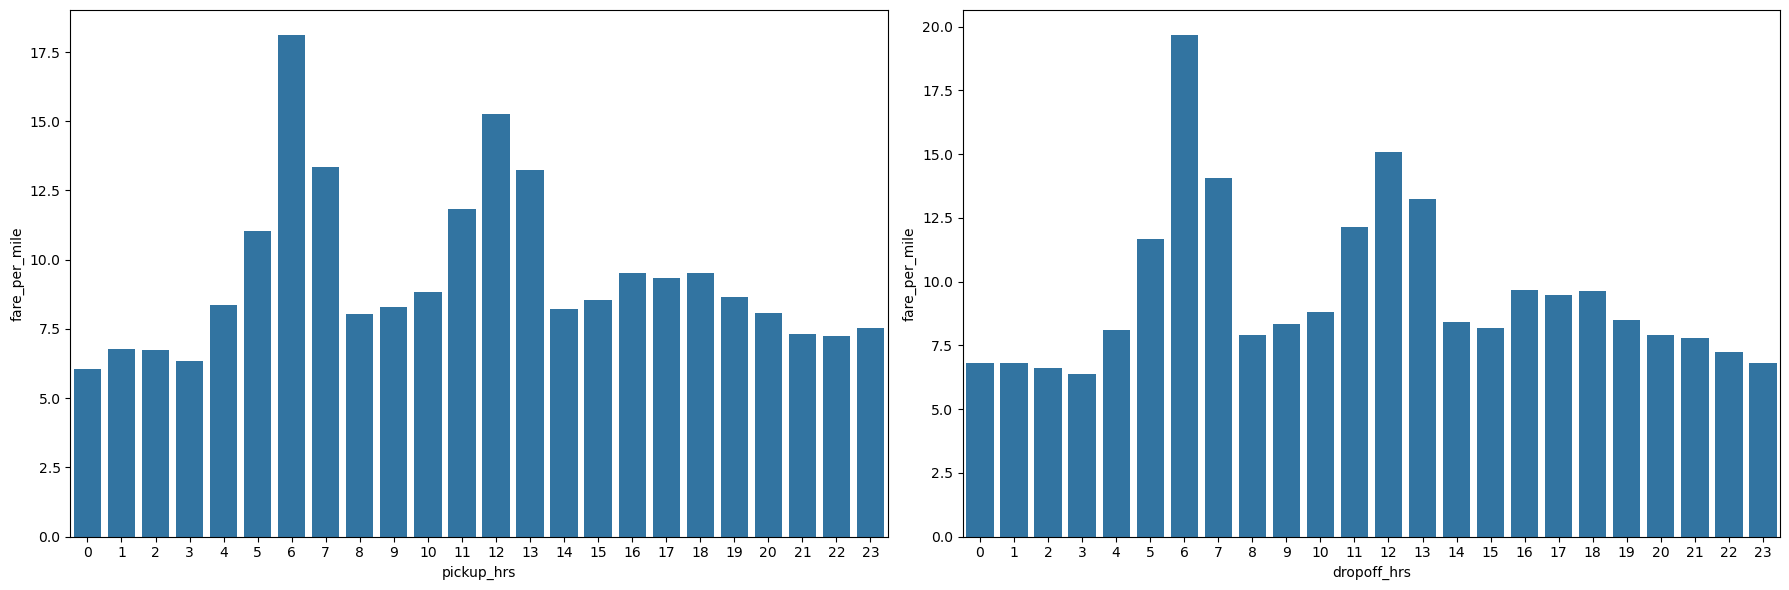

In [299]:
# calculate fare by distance and plot
df2 = df[df['trip_distance']!=0].copy()
df2['fare_per_mile'] = df2['total_amount']/df2['trip_distance']
avg_pickup_hrs_per_mile = df2.groupby('pickup_hrs')['fare_per_mile'].mean()
avg_dropoff_hrs_per_mile = df2.groupby('dropoff_hrs')['fare_per_mile'].mean()

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.barplot(x=avg_pickup_hrs_per_mile.index, y=avg_pickup_hrs_per_mile)
plt.subplot(1,2,2)
sns.barplot(x=avg_dropoff_hrs_per_mile.index, y=avg_dropoff_hrs_per_mile)
plt.tight_layout()
plt.show()

In [301]:
# examine payment type
df.groupby('payment_type')['fare_amount'].mean()

payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64

In [303]:
df.groupby('payment_type')['total_amount'].mean()

payment_type
1    17.663577
2    13.545821
3    13.579669
4    11.238261
Name: total_amount, dtype: float64

In [305]:
df.groupby('payment_type')['tip_amount'].mean()

payment_type
1    2.7298
2    0.0000
3    0.0000
4    0.0000
Name: tip_amount, dtype: float64

### looks like customer using credit card pay more and give more tips. I want to test if it's true. Set the p-value as 5%

In [41]:
# hypothesis testing
credit_fare = df[df['payment_type']==1]['fare_amount']
cash_fare = df[df['payment_type']==2]['fare_amount']
stats.ttest_ind(a=credit_fare, b=cash_fare, equal_var=False)

TtestResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12, df=16675.48547403633)

In [43]:
credit_total = df[df['payment_type']==1]['total_amount']
cash_total = df[df['payment_type']==2]['total_amount']
stats.ttest_ind(a=credit_total, b=cash_total, equal_var=False)

TtestResult(statistic=20.34644022783838, pvalue=4.5301445359736376e-91, df=19245.398563776336)

### Both p-values are significantly lower than 5%, so the null hypothesis is rejected. 

## Regression

In [47]:
# data engineer to create trip duration variable
df['tpep_pickup_datetime'][0]

Timestamp('2017-03-25 08:55:43')

In [49]:
df0=df.copy()

In [51]:
# Convert datetime columns to datetime
# Convert datetime columns to datetime
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

print('Data type of pickup time: ', df0['tpep_pickup_datetime'].dtype)
print('Data type of dropoff time: ', df0['tpep_dropoff_datetime'].dtype)

Data type of pickup time:  datetime64[ns]
Data type of dropoff time:  datetime64[ns]


In [53]:
# Create `duration` column
df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime'])/np.timedelta64(1,'m')
df0['duration'].head()

0    14.066667
1    26.500000
2     7.200000
3    30.250000
4    16.716667
Name: duration, dtype: float64

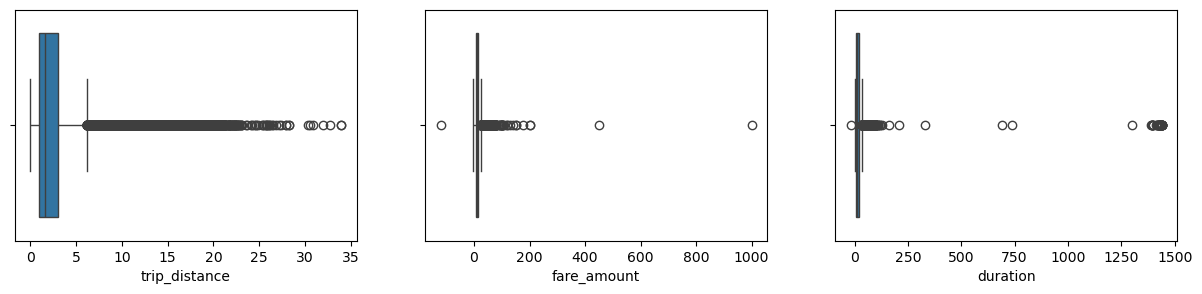

In [55]:
# check for outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
sns.boxplot(x=df0['trip_distance'], ax=axes[0])
sns.boxplot(x=df0['fare_amount'], ax=axes[1])
sns.boxplot(x=df0['duration'], ax=axes[2])
plt.show()

In [57]:
# there are trip distance with values of 0, check if they are outliers
df0.sort_values(by='trip_distance')[['trip_distance', 'fare_amount', 'duration']].head(10)

,trip_distance,fare_amount,duration
22026,0.0,10.5,0.000000
795,0.0,8.0,0.000000
6908,0.0,18.0,0.066667
13561,0.0,32.0,0.383333
12238,0.0,2.5,0.233333
6878,0.0,98.5,0.050000
14372,0.0,4.5,4.466667
20638,0.0,2.5,0.000000
920,0.0,2.5,0.566667
16263,0.0,2.5,0.350000


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

**Some of the 0 distance trip have questionable fare and duration, they may not pose a problem but it maybe safe just drop them since the number of data entires is low**

In [60]:
# Calculate the count of rides where the `trip_distance` is zero.
len(df0[df0['trip_distance']==0])

148

In [62]:
# check the outliers of fare amounts
df0['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

<b>Large negative number should be impossible and treated as input errors, very large positive fares are also unlikely due to the short distance traveled. The outlier boundary calculated from the statistics is \$26.5 which is low consider real life experience.<b> <b>From the boxplot we can see that only a handful examples that exceeded \$200, I will use 200 as the abitary cutoff for the fare amount.

In [65]:
df0[df0['fare_amount']<0].head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration
314,105454287,2,2017-12-13 02:02:39,2017-12-13 02:03:08,6,0.12,1,N,161,161,...,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,December,Wednesday,0.483333
1646,57337183,2,2017-07-05 11:02:23,2017-07-05 11:03:00,1,0.04,1,N,79,79,...,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3,July,Wednesday,0.616667
4423,97329905,2,2017-11-16 20:13:30,2017-11-16 20:14:50,2,0.06,1,N,237,237,...,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,November,Thursday,1.333333
5448,28459983,2,2017-04-06 12:50:26,2017-04-06 12:52:39,1,0.25,1,N,90,68,...,-3.5,0.0,-0.5,0.0,0.0,-0.3,-4.3,April,Thursday,2.216667
5758,833948,2,2017-01-03 20:15:23,2017-01-03 20:15:39,1,0.02,1,N,170,170,...,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,January,Tuesday,0.266667
8204,91187947,2,2017-10-28 20:39:36,2017-10-28 20:41:59,1,0.41,1,N,236,237,...,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8,October,Saturday,2.383333
10281,55302347,2,2017-06-05 17:34:25,2017-06-05 17:36:29,2,0.00,1,N,238,238,...,-2.5,-1.0,-0.5,0.0,0.0,-0.3,-4.3,June,Monday,2.066667
11204,58395501,2,2017-07-09 07:20:59,2017-07-09 07:23:50,1,0.64,1,N,50,48,...,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,July,Sunday,2.850000
12944,29059760,2,2017-04-08 00:00:16,2017-04-08 23:15:57,1,0.17,5,N,138,138,...,-120.0,0.0,0.0,0.0,0.0,-0.3,-120.3,April,Saturday,1395.683333
14714,109276092,2,2017-12-24 22:37:58,2017-12-24 22:41:08,5,0.40,1,N,164,161,...,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3,December,Sunday,3.166667


**Looks like many of them are simply input errors, I can convert them into positive values by multiple them by -1**

In [68]:
df1 = df0.copy()

In [70]:
def invert(df, col_list):
    for name in col_list:
        df.loc[df[name]<0, name] = df.loc[df[name]<0, name]*(-1)

In [72]:
#do the same to other charges
col_list = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'duration']
invert(df1, col_list)

In [74]:
df1[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'duration']].describe()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,13.041035,0.333759,0.498018,1.835781,0.312542,0.299921,16.326336,17.015273
std,13.229605,0.462747,0.031422,2.800626,1.399212,0.004877,16.081236,61.996071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000


In [76]:
# number of negative duration
len(df1[df1['duration']<0])

0

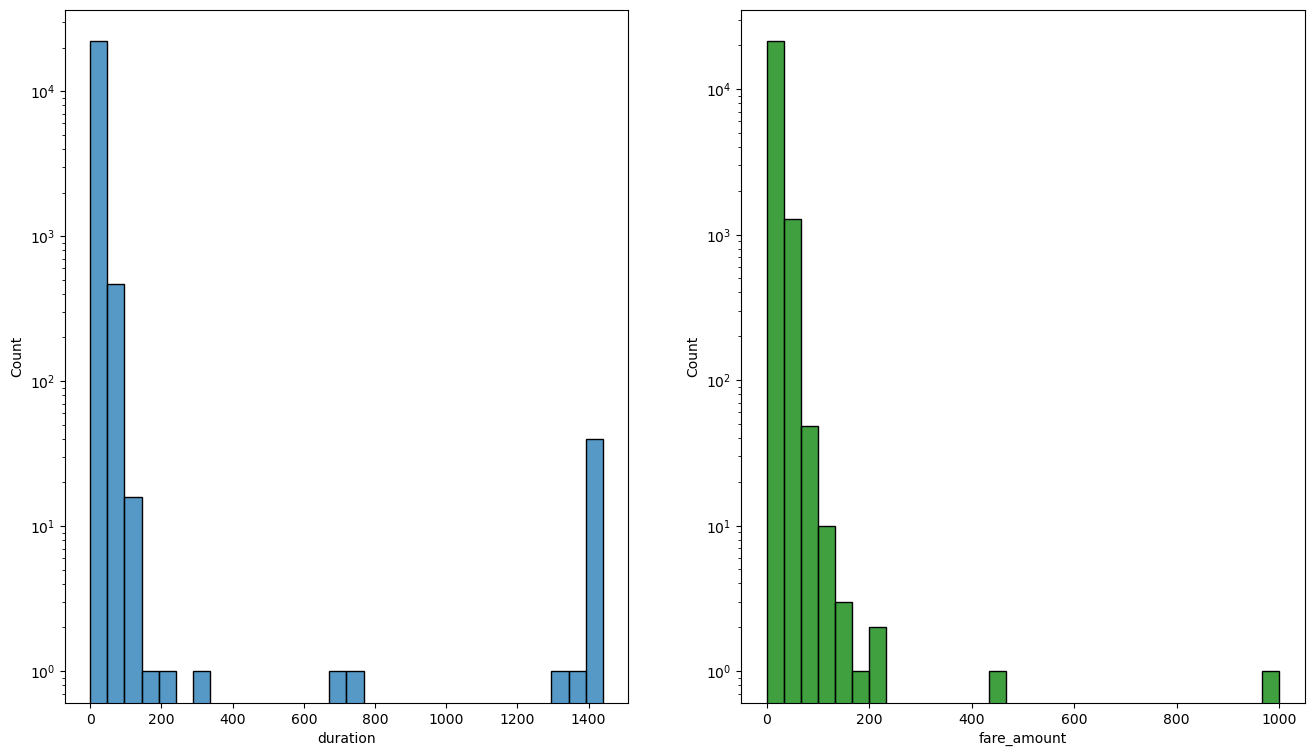

In [78]:
# number of ultra long duration
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.histplot(bins=30, data=df1['duration'], ax=axes[0])
axes[0].set_yscale('log')
sns.histplot(bins=30, data=df1['fare_amount'], color = 'green', ax=axes[1])
axes[1].set_yscale('log')
plt.show()

**It should be safe to remove duration more than 100 and fare amount more than 100, there are less than 100 entries in this range, which is a very small portion of the data.**

In [81]:
df1 = df1[df1['duration']<100]
df1 = df1[df1['fare_amount']<100]
df1[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'duration']].describe()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,22624.000000,22624.000000,22624.000000,22624.000000,22624.000000,22624.000000,22624.000000,22624.000000
mean,12.857296,0.333473,0.498254,1.813345,0.306600,0.299920,16.114185,14.266813
std,10.550917,0.460592,0.029495,2.378549,1.377333,0.004885,13.092336,11.356011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.150000
75%,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.283333
max,99.000000,4.500000,0.500000,42.290000,19.100000,0.300000,119.310000,98.400000


In [83]:
# create mean_distance column

In [85]:
# check numbers of entries with the same pickup and dropoff location
len(df1[df1['PULocationID']==df1['DOLocationID']])

1492

In [87]:
# combine the pickup and dropoff loction for a new paired name column
df1['pickup_dropoff'] = df1['PULocationID'].astype(str) + ' ' + df1['DOLocationID'].astype(str)
df1['pickup_dropoff'].head()

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object

In [89]:
# compute the mean distance for each pickup-dropoff pair
grouped = df1.groupby('pickup_dropoff')[['duration', 'trip_distance']].mean(numeric_only=True)
grouped.head()

,duration,trip_distance
pickup_dropoff,,
1 1,0.358333,0.000000
10 148,69.366667,15.700000
100 1,48.183333,16.890000
100 100,3.130556,0.253333
100 107,11.200000,1.180000


In [91]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped['trip_distance'].to_dict()

In [93]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df1['mean_distance'] = df1['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df1['mean_distance'] = df1['mean_distance'].map(grouped_dict)

# Confirm that it worked
df1[(df1['PULocationID']==100) & (df1['DOLocationID']==231)][['pickup_dropoff', 'mean_distance']]

,pickup_dropoff,mean_distance
0,100 231,3.521667
4909,100 231,3.521667
16636,100 231,3.521667
18134,100 231,3.521667
19761,100 231,3.521667
20581,100 231,3.521667


In [95]:
grouped_dict2 = grouped['duration'].to_dict()
df1['mean_duration'] = df1['pickup_dropoff']
df1['mean_duration'] = df1['mean_duration'].map(grouped_dict2)
df1[(df1['PULocationID']==100) & (df1['DOLocationID']==231)][['pickup_dropoff', 'mean_duration', 'mean_distance']]

,pickup_dropoff,mean_duration,mean_distance
0,100 231,22.847222,3.521667
4909,100 231,22.847222,3.521667
16636,100 231,22.847222,3.521667
18134,100 231,22.847222,3.521667
19761,100 231,22.847222,3.521667
20581,100 231,22.847222,3.521667


In [97]:
# Create 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

df1[['day', 'month']].head()

,day,month
0,saturday,mar
1,tuesday,apr
2,friday,dec
3,sunday,may
4,saturday,apr


In [99]:
# Create 'rush_hour' col
df1['hour'] = df1['tpep_pickup_datetime'].dt.hour
df1['rush_hour'] = 0

df1.loc[((df1['hour']>=6) & (df1['hour']<10)) | ((df1['hour']>=16) & (df1['hour']<20)), 'rush_hour'] = 1
df1.loc[df1['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [101]:
df1[['hour', 'rush_hour']].head(10)

,hour,rush_hour
0,8,0
1,14,0
2,7,1
3,13,0
4,23,0
5,20,0
6,19,1
7,17,1
8,16,0
9,15,0


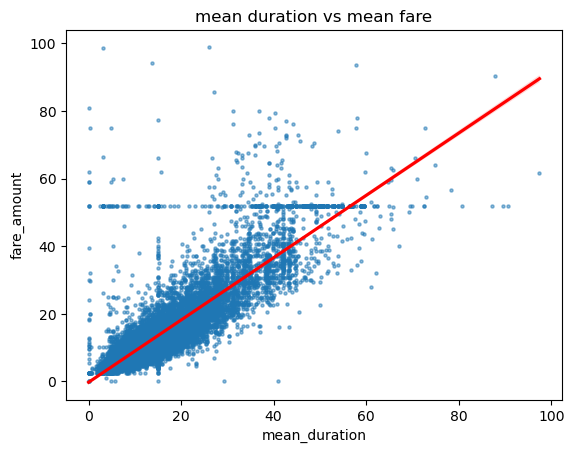

In [103]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.regplot(x=df1['mean_duration'], y=df1['fare_amount'], scatter_kws={'alpha':0.5, 's':5}, line_kws={'color': 'red'})
plt.title('mean duration vs mean fare')
plt.show()

In [104]:
# find the value of the horizontal line
df1[df1['fare_amount']>50]['fare_amount'].value_counts().head()

fare_amount
52.0    505
59.0      9
57.5      8
50.5      7
51.0      7
Name: count, dtype: int64

In [107]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df1[df1['fare_amount']==52.0].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,hour,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,mar,sunday,36.800000,236 132,19.102000,30.843333,19,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,jun,saturday,66.850000,132 163,19.229000,52.941667,14,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,nov,saturday,0.966667,132 132,2.255862,3.021839,20,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,dec,wednesday,29.183333,132 79,19.431667,47.275000,23,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,sep,sunday,29.483333,132 234,17.654000,49.833333,23,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,feb,tuesday,39.833333,132 48,18.394000,56.719167,18,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,jun,monday,15.616667,228 88,4.730000,15.616667,12,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,aug,thursday,45.450000,132 48,18.394000,56.719167,22,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,sep,tuesday,42.850000,186 132,17.096000,42.920000,13,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,apr,sunday,71.583333,132 148,17.994286,46.340476,21,0


**They all have rate code JFK, is it a flat fee at JFK? I should check how many entries with RatecodeID=2**

In [110]:
len(df1[df1['RatecodeID']==2])

504

**it's almost the same as the 505 entries in the plot, so all code 2 data has the same rate.**

In [113]:
# Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.
df2 = df1.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month', 'hour'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22624 entries, 0 to 22698
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22624 non-null  int64  
 1   passenger_count  22624 non-null  int64  
 2   RatecodeID       22624 non-null  int64  
 3   fare_amount      22624 non-null  float64
 4   mean_distance    22624 non-null  float64
 5   mean_duration    22624 non-null  float64
 6   rush_hour        22624 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.4 MB


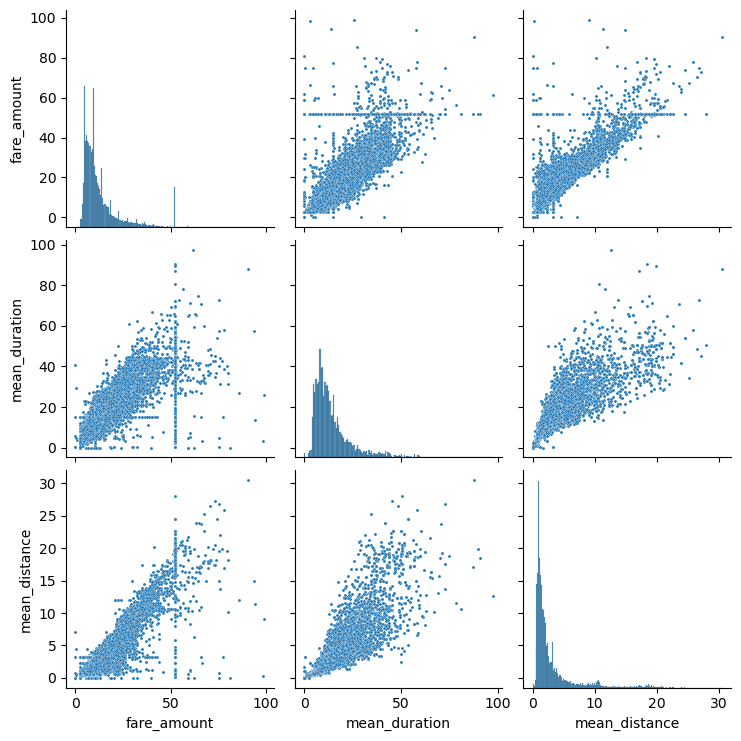

In [115]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']], plot_kws={'s':5})

In [116]:
# Correlation matrix to help determine most correlated variables
df2.corr('pearson')

,VendorID,passenger_count,RatecodeID,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266814,-0.004437,-0.001571,0.002505,-0.000723,-0.002904
passenger_count,0.266814,1.000000,-0.005167,0.015818,0.013732,0.015802,-0.022311
RatecodeID,-0.004437,-0.005167,1.000000,0.221247,0.151165,0.107998,0.007050
fare_amount,-0.001571,0.015818,0.221247,1.000000,0.910577,0.861840,-0.021445
mean_distance,0.002505,0.013732,0.151165,0.910577,1.000000,0.879873,-0.042344
mean_duration,-0.000723,0.015802,0.107998,0.861840,0.879873,1.000000,-0.024205
rush_hour,-0.002904,-0.022311,0.007050,-0.021445,-0.042344,-0.024205,1.000000


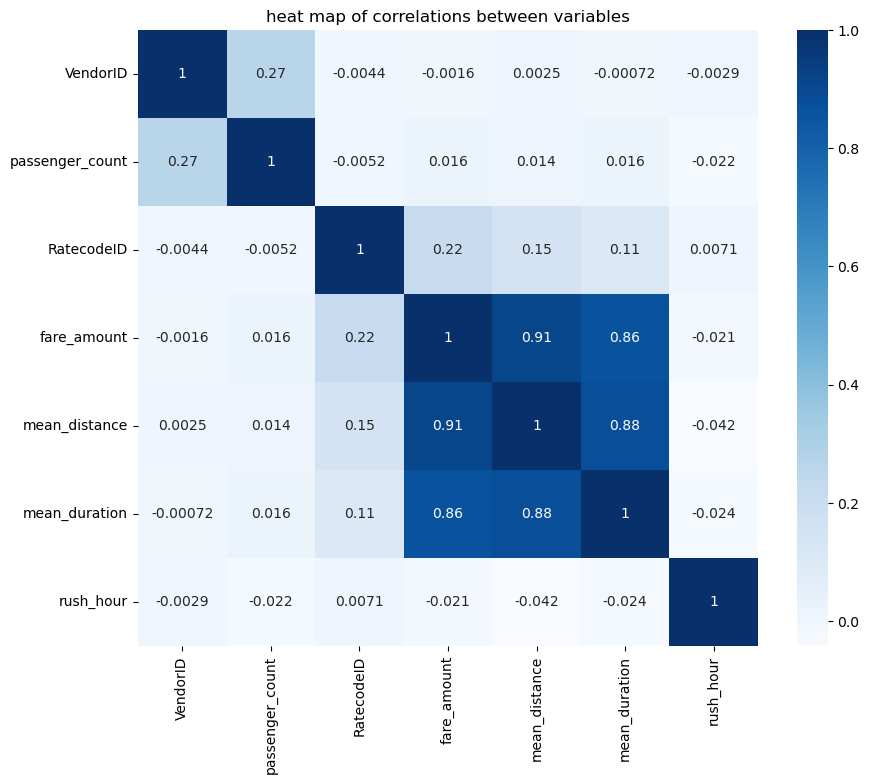

In [117]:
# Create correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr('pearson'), annot=True, cmap='Blues')
plt.title('heat map of correlations between variables')
plt.show()

**Duration and distance are both strongly correlated with fare, passenger number is weakly correlated.**

In [119]:
# prepare data for linear regression
y = df2[['fare_amount']]
X = df2.drop('fare_amount', axis=1)

X.head()

,VendorID,passenger_count,RatecodeID,mean_distance,mean_duration,rush_hour
0,2,6,1,3.521667,22.847222,0
1,1,1,1,3.108889,24.470370,0
2,1,1,1,0.881429,7.250000,1
3,2,1,1,3.700000,30.250000,0
4,2,1,1,4.435000,14.616667,0


In [124]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)
# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,RatecodeID,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,1,3.521667,22.847222,0,True
1,1,1,3.108889,24.470370,0,False
2,1,1,0.881429,7.250000,1,False
3,1,1,3.700000,30.250000,0,True
4,1,1,4.435000,14.616667,0,True


In [126]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [128]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [130]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.50155957, -0.0530184 , -0.47934979, -0.81051781,  1.54042315,
        -1.11242213],
       [-0.50155957, -0.0530184 , -0.53378388, -0.82412769, -0.64917228,
        -1.11242213],
       [-0.50155957, -0.0530184 ,  0.11108139,  0.59736329, -0.64917228,
        -1.11242213],
       ...,
       [ 1.05085201, -0.0530184 ,  2.20700059,  0.88216194, -0.64917228,
        -1.11242213],
       [-0.50155957, -0.0530184 ,  1.44788956,  0.85351356,  1.54042315,
         0.89893932],
       [-0.50155957, -0.0530184 , -0.53797385, -0.64152137,  1.54042315,
         0.89893932]])

In [132]:
# Fit your model to the training data
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [134]:
# Evaluate the model performance on the training data
coeff = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', coeff)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8583027433135971
R^2: 0.8583027433135971
MAE: 2.114875637314934
MSE: 15.88223105036317
RMSE: 3.9852516922226093


In [136]:
# test data
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [138]:
# Evaluate the model performance on the testing data
coeff_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', coeff_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.835350824301859
R^2: 0.835350824301859
MAE: 2.1557982015571184
MSE: 17.82089293909056
RMSE: 4.221479946546064


In [140]:
# get results
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
12951,13.5,11.161704,2.338296
8047,4.0,5.374899,-1.374899
13781,9.5,10.551470,-1.051470
14694,7.5,7.303991,0.196009
19807,52.0,50.565824,1.434176


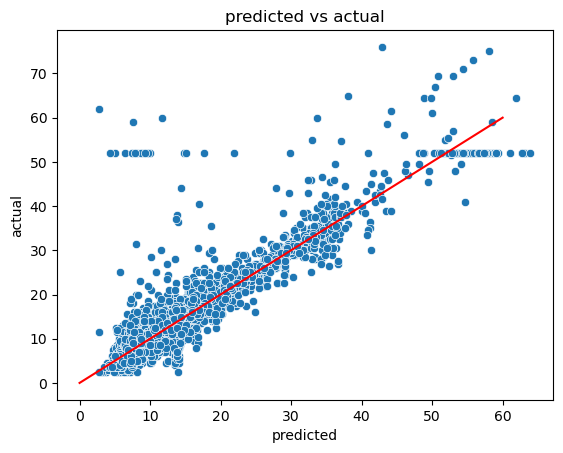

In [142]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x=results['predicted'], y=results['actual'])
plt.title('predicted vs actual')
plt.plot([0,60], [0, 60], c='red')
plt.show()

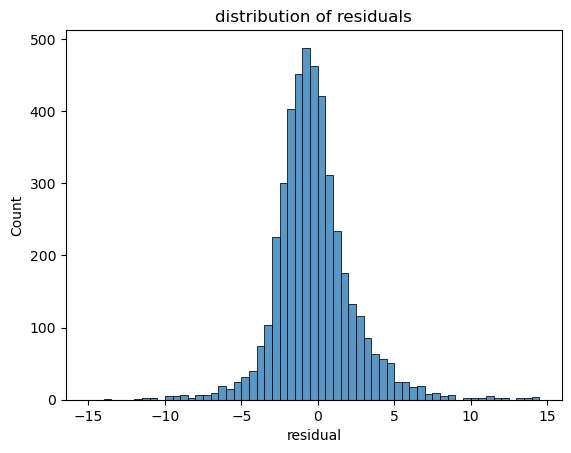

In [144]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15, 15, 0.5))
plt.title('distribution of residuals')
plt.show()

In [146]:
# Calculate residual mean
results['residual'].mean()

0.07637044116511592

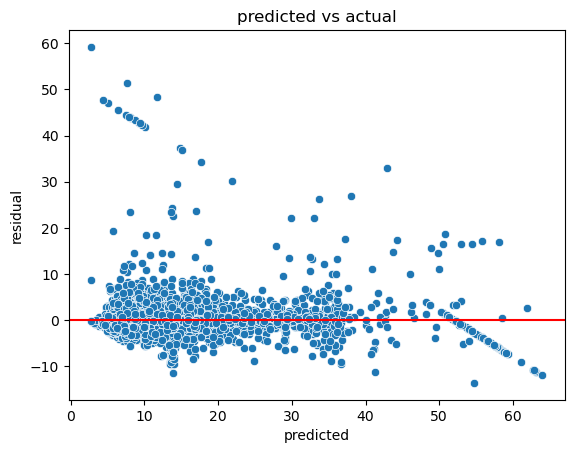

In [148]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x=results['predicted'], y=results['residual'])
plt.axhline(0, c='red')
plt.title('predicted vs actual')
plt.show()

In [150]:
# Output the model's coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,RatecodeID,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.085035,0.946458,6.934495,2.96212,0.14913,-0.059828


**The coefficients mean that the distance is the main factor that determines the fare, and followed by duration. For each standard deviation increase, the fare increase $6.87**

## Conclusion

1. EDA can provide deep insight into the data and help the model construct later in the project. Multi linear regression performed well in this project.
2. I can present the model summary and examples of prediction to the stakeholders. The evaluation scores, such as MAE, MSE should also be presented so the stakeholders know what's the limitation of the model.

## Tree based models

**The New York City Taxi & Limousine Commission (New York City TLC), was impressed with the work you have done and has requested that you build a machine learning model to predict if a customer will not leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips.**

In [207]:
# From previous EDA that customers who pay cash generally have a tip amount of $0. 
# To meet the modeling objective, I'll need to sample the data to select only the customers who pay with credit card. 
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,hour,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,mar,saturday,14.066667,100 231,3.521667,22.847222,8,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,apr,tuesday,26.500000,186 43,3.108889,24.470370,14,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,dec,friday,7.200000,262 236,0.881429,7.250000,7,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,may,sunday,30.250000,188 97,3.700000,30.250000,13,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,apr,saturday,16.716667,4 112,4.435000,14.616667,23,0


In [209]:
df3 = df1[df1['payment_type']==1].copy()

In [211]:
# Create tip % col
df3['tip_pct'] = round(df3['tip_amount']/(df3['total_amount']-df3['tip_amount']), 3)

In [213]:
df3['tip_pct'].head()

0    0.200
1    0.238
2    0.199
3    0.300
5    0.200
Name: tip_pct, dtype: float64

In [215]:
# Create 'generous' col (target)
df3['generous'] = df3['tip_pct']

In [217]:
df3['generous'] = (df3['generous']>=0.2)

In [219]:
df3['generous'] = df3['generous'].astype(int)

In [221]:
df3['generous'].head()

0    1
1    1
2    0
3    1
5    1
Name: generous, dtype: int32

In [223]:
df3['generous'].value_counts()

generous
1    8011
0    7213
Name: count, dtype: int64

In [227]:
# divide a day into four sections
time_list = ['am_rush', 'daytime', 'pm_rush', 'nighttime']
hour_list = [(6, 10), (10, 16), (16, 20), (20, 6)]

for time, hour in zip(time_list, hour_list):
    #df3[time] = df3['tpep_pickup_datetime'].dt.hour
    df3[time] = df3['hour']
    if time == 'nighttime':
        df3[time] = (((df3[time]>=20) & (df3[time]<24)) | ((df3[time]>=0) & (df3[time]<6)))
        df3[time] = df3[time].astype(int)
    else:
        df3[time] = ((df3[time]>=hour[0]) & (df3[time]<hour[1])).astype(int)

df3.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,hour,rush_hour,tip_pct,generous,am_rush,daytime,pm_rush,nighttime
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,mar,saturday,14.066667,100 231,3.521667,22.847222,8,0,0.200,1,1,0,0,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,apr,tuesday,26.500000,186 43,3.108889,24.470370,14,0,0.238,1,0,1,0,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,dec,friday,7.200000,262 236,0.881429,7.250000,7,1,0.199,0,1,0,0,0
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,may,sunday,30.250000,188 97,3.700000,30.250000,13,0,0.300,1,0,1,0,0
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,mar,saturday,8.000000,161 236,2.052258,11.855376,20,0,0.200,1,0,0,0,1


In [231]:
# Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. 
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'tip_pct', 'rush_hour', 'pickup_dropoff', 'duration', 'hour']

df4 = df3.drop(drop_cols, axis=1).copy()
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15224 entries, 0 to 22698
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15224 non-null  int64  
 1   passenger_count  15224 non-null  int64  
 2   RatecodeID       15224 non-null  int64  
 3   PULocationID     15224 non-null  int64  
 4   DOLocationID     15224 non-null  int64  
 5   month            15224 non-null  object 
 6   day              15224 non-null  object 
 7   mean_distance    15224 non-null  float64
 8   mean_duration    15224 non-null  float64
 9   generous         15224 non-null  int32  
 10  am_rush          15224 non-null  int32  
 11  daytime          15224 non-null  int32  
 12  pm_rush          15224 non-null  int32  
 13  nighttime        15224 non-null  int32  
dtypes: float64(2), int32(5), int64(5), object(2)
memory usage: 1.5+ MB


In [233]:
df4.isnull().sum()

VendorID           0
passenger_count    0
RatecodeID         0
PULocationID       0
DOLocationID       0
month              0
day                0
mean_distance      0
mean_duration      0
generous           0
am_rush            0
daytime            0
pm_rush            0
nighttime          0
dtype: int64

In [235]:
# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

# 2. Convert each column to string
for col in cols_to_str:
    df4[col] = df4[col].astype('str')

In [237]:
df4[df4.select_dtypes('int32').columns] = df4.select_dtypes('int32').astype('int64')

In [239]:
df4 = pd.get_dummies(df4, drop_first=True)

In [241]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15224 entries, 0 to 22698
Columns: 346 entries, passenger_count to day_wednesday
dtypes: bool(338), float64(2), int64(6)
memory usage: 6.0 MB


In [243]:
# Get class balance of 'generous' col
df4['generous'].value_counts(normalize=True)

generous
1    0.526209
0    0.473791
Name: proportion, dtype: float64

In [245]:
# prepare data for modeling
# Isolate target variable (y)
y = df4['generous']

# Isolate the features (X)
X = df4.drop('generous', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

## Random Forest

In [247]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier()

# 2. Create a dictionary of hyperparameters to tune 
cv_params = {'max_depth': [None, 5, 10],
             'max_samples': [0.5, 0.7, 0.9],
             'min_samples_leaf': [1, 2, 4],
             'n_estimators': [100, 300],}

# 3. Define a set of scoring metrics to capture
# scoring = {'accuracy', 'precision', 'recall', 'f1'}
# scoring = {
#     'accuracy': 'accuracy',
#     'precision': 'precision',
#     'recall': 'recall',
#     'f1': 'f1'
# }

# 4. Instantiate the GridSearchCV object
# rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1', n_jobs=-1, verbose=3)
rf1 = GridSearchCV(rf, cv_params, scoring='f1', cv=4, n_jobs=-1, verbose=3)

In [255]:
rf1.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_samples': [0.5, 0.7, 0.9],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 300]},
             scoring='f1', verbose=3)

In [256]:
import pickle 

# Define a path to the folder where you want to save the model
path = 'D:/Learn/jupyternotebook/'

In [257]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [258]:
write_pickle(path, rf1, 'tlc_rf1')
print('done')

done


In [259]:
rf1=read_pickle(path, 'tlc_rf1')
print('done')

done


In [260]:
rf1.best_score_

0.7492119412508554

In [261]:
rf1.best_params_

{'max_depth': None,
 'max_samples': 0.5,
 'min_samples_leaf': 2,
 'n_estimators': 300}

In [332]:
rf1_pred = rf1.best_estimator_.predict(X_test)

In [334]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.60      0.65      1443
           1       0.69      0.80      0.74      1602

    accuracy                           0.70      3045
   macro avg       0.71      0.70      0.70      3045
weighted avg       0.70      0.70      0.70      3045



In [336]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [338]:
rf1_scores = get_test_scores('RF test', y_pred, y_test)
rf1_scores

,model,precision,recall,F1,accuracy
0,RF test,0.686422,0.795256,0.736842,0.701149


## XGBoost

In [312]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic')

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'learning_rate': [0.1],
             'max_depth': [4, 8],
             'min_child_weight': [2],
             'n_estimators': [100, 300, 500]
             }

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring = 'f1', cv=4, n_jobs=-1, verbose=3)

In [314]:
xgb1.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [4, 8],
                         'min_child_weight': [2],
                         'n_estimators': [100, 300, 500]},
             scoring='f1', verbose=3)

In [316]:
write_pickle(path, xgb1, 'tlc_xgb1')
print('writing done')

writing done


In [318]:
xgb1 = read_pickle(path, 'tlc_xgb1')
print('reading done')

reading done


In [320]:
xgb1.best_score_

0.7462618608233321

In [322]:
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 2,
 'n_estimators': 100}

In [324]:
xgb1_pred = xgb1.best_estimator_.predict(X_test)

In [340]:
xgb1_scores = get_test_scores('XGB test', xgb1_pred, y_test)
scores = pd.concat([rf1_scores, xgb1_scores], axis=0)

In [342]:
scores

,model,precision,recall,F1,accuracy
0,RF test,0.686422,0.795256,0.736842,0.701149
0,XGB test,0.686858,0.792759,0.736019,0.700821


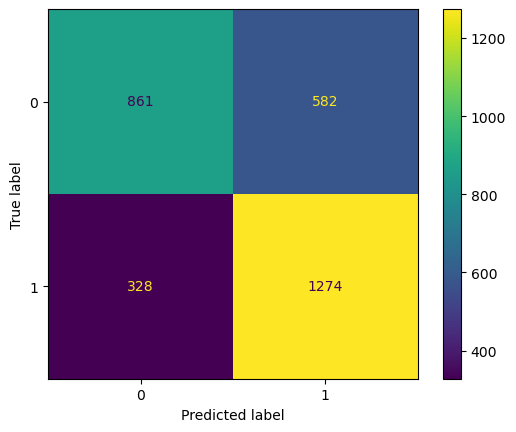

In [344]:
# Generate confusion matrix for random forest
cm = confusion_matrix(y_test, rf1_pred, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf1.classes_)
disp.plot(values_format='')

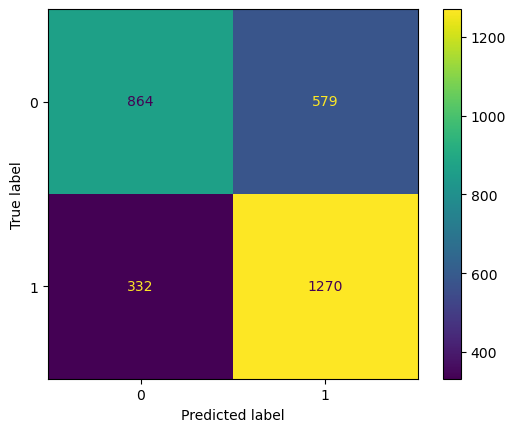

In [353]:
# Generate confusion matrix for random forest
cm = confusion_matrix(y_test, xgb1_pred, labels=xgb1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb1.classes_)
disp.plot(values_format='')

**False positive is the more common error which is almost twice as much likely.**

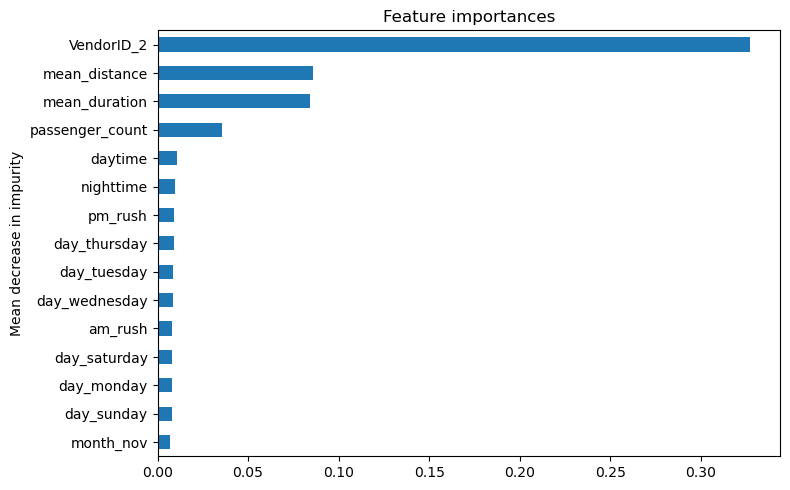

In [351]:
# plot importance
importances = rf1.best_estimator_.feature_importances_  
rf_importances = pd.Series(importances, index=X_test.columns).sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.barh(ax=ax)
ax.invert_yaxis()
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

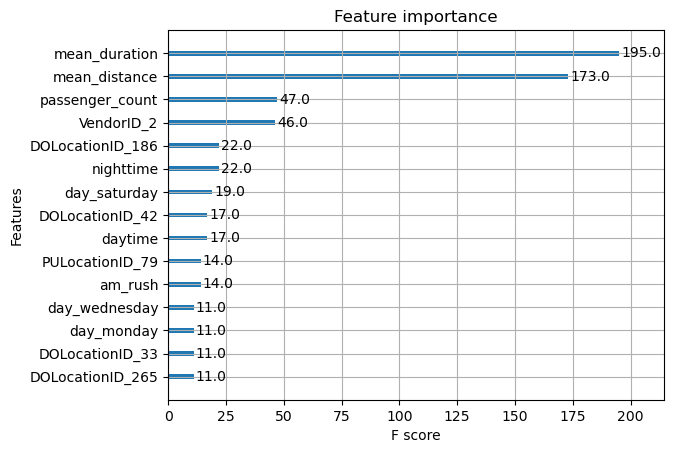

In [355]:
plot_importance(xgb1.best_estimator_, importance_type='weight', max_num_features=15)

## Conclusion

1. **Would you recommend using this model? Why or why not?**  
I will not recommend using this model. Even though the scores are decent, the model has a significant chance to predict a generous tip when driver will not get it. This may upset the driver and loss the trust to the app. 

2. **What was your model doing? Can you explain how it was making predictions?**   
My model use tree based models like random forest and XGBoosting. They split the data using some type of criterias that max the information gain. Both of them show that mean distance, mean duration, predicted fare, vendor and passenger count are most importance factors, however, they can not tell exactly why these factors matter. 

3. **Are there new features that you can engineer that might improve model performance?**
We can always create new features to test models, they may or may not help improve the performance. For instance, we can transform distance into a binary data like far and near so we can better understand how the distance affect tips.

4. **What features would you want to have that would likely improve the performance of your model?** 
There are many features that can help, some are easier to obtain, such as whether the passenger tipped before, how much and how often. And more data entries are always helpful.